## Tamil Handwritten Character Recognition

In [11]:
import numpy as np
from cnn_model import cnn_model
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# Data Augmentation

batch_size = 128
img_width, img_height = 96, 96

train_datagen = ImageDataGenerator(
    zca_whitening=True,
    rescale=1./255)

valid_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'train_files',
    target_size=(img_width, img_height),    
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
    'valid_files',
    target_size=(img_width, img_height),   
    batch_size=batch_size,
    class_mode='categorical')


/usr/local/lib/python3.6/site-packages/keras_preprocessing/image/image_data_generator.py:334: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 46800 images belonging to 156 classes.
Found 15600 images belonging to 156 classes.


In [5]:
Image_size = 96
num_of_classes = 156

cnn_transfer_model = cnn_model(Image_size, num_of_classes)

In [6]:
cnn_transfer_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 96, 96, 3)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 98, 98, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1792      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 48, 48, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 128)       73856     
__________

In [7]:
# Loading model weights

cnn_transfer_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
epochs = 20

from keras.callbacks import ModelCheckpoint  

checkpointer_datagen = ModelCheckpoint(filepath='Chine_Transfer_Model_weights_batch128.Augmentation_zca.best.hdf5', 
                               verbose=1, save_best_only=True)

history = cnn_transfer_model.fit_generator(train_generator, steps_per_epoch=10000 // batch_size, epochs=epochs, validation_data=validation_generator,
                    validation_steps=4000 // batch_size, callbacks=[checkpointer_datagen],  verbose=1)

Epoch 1/20
78/78 [==============================] - 61s 778ms/step - loss: 2.5934 - acc: 0.3965 - val_loss: 1.3105 - val_acc: 0.6411

Epoch 00001: val_loss improved from inf to 1.31045, saving model to Chine_Transfer_Model_weights_batch128.Augmentation_zca.best.hdf5
Epoch 2/20
78/78 [==============================] - 51s 660ms/step - loss: 0.9261 - acc: 0.7514 - val_loss: 0.6899 - val_acc: 0.8022

Epoch 00002: val_loss improved from 1.31045 to 0.68991, saving model to Chine_Transfer_Model_weights_batch128.Augmentation_zca.best.hdf5
Epoch 3/20
78/78 [==============================] - 52s 661ms/step - loss: 0.5647 - acc: 0.8392 - val_loss: 0.4886 - val_acc: 0.8632

Epoch 00003: val_loss improved from 0.68991 to 0.48863, saving model to Chine_Transfer_Model_weights_batch128.Augmentation_zca.best.hdf5
Epoch 4/20
78/78 [==============================] - 53s 677ms/step - loss: 0.4647 - acc: 0.8615 - val_loss: 0.4600 - val_acc: 0.8616

Epoch 00004: val_loss improved from 0.48863 to 0.45996, s

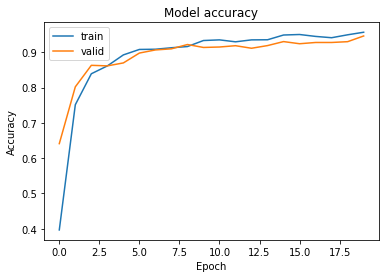

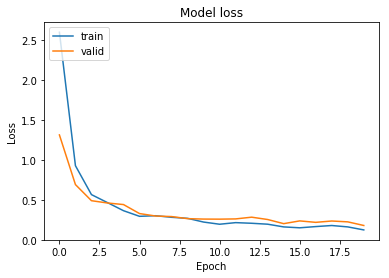

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [30]:
print("Training Accuracy = ", history.history['acc'][-1])
print("Validation Accuracy = ", history.history['val_acc'][-1])

Training Accuracy =  0.9569310897435898
Validation Accuracy =  0.946356274821015


In [8]:
# Loading the model weights with the best validation loss.

cnn_transfer_model.load_weights('Chine_Transfer_Model_weights_batch128.Augmentation_zca.best.hdf5')

In [9]:
# Test data

test_datagen = ImageDataGenerator(
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'test_files',
    target_size=(img_width, img_height), 
    batch_size=100,
    shuffle = False,
    class_mode='categorical')

Found 15600 images belonging to 156 classes.


In [41]:
# Evaluating the model on test data

score = cnn_transfer_model.evaluate_generator(test_generator, 156)

print(f'Testing Accuracy = {score[1]}')
print(f'Testing Loss =  {score[0]}')

Testing Accuracy = 0.9342948779081687
Testing Loss =  0.2148984580409701


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Testing data predictions
Y_pred = cnn_transfer_model.predict_generator(test_generator, test_generator.samples // test_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)

In [14]:
# Calculating testing accuracy

labels = len(test_generator.classes)
accuracy = sum([y_pred[i]==test_generator.classes[i] for i in range(labels)])/labels

print(f'Testing data accuracy = {accuracy}')

Testing data accuracy = 0.9342948717948718


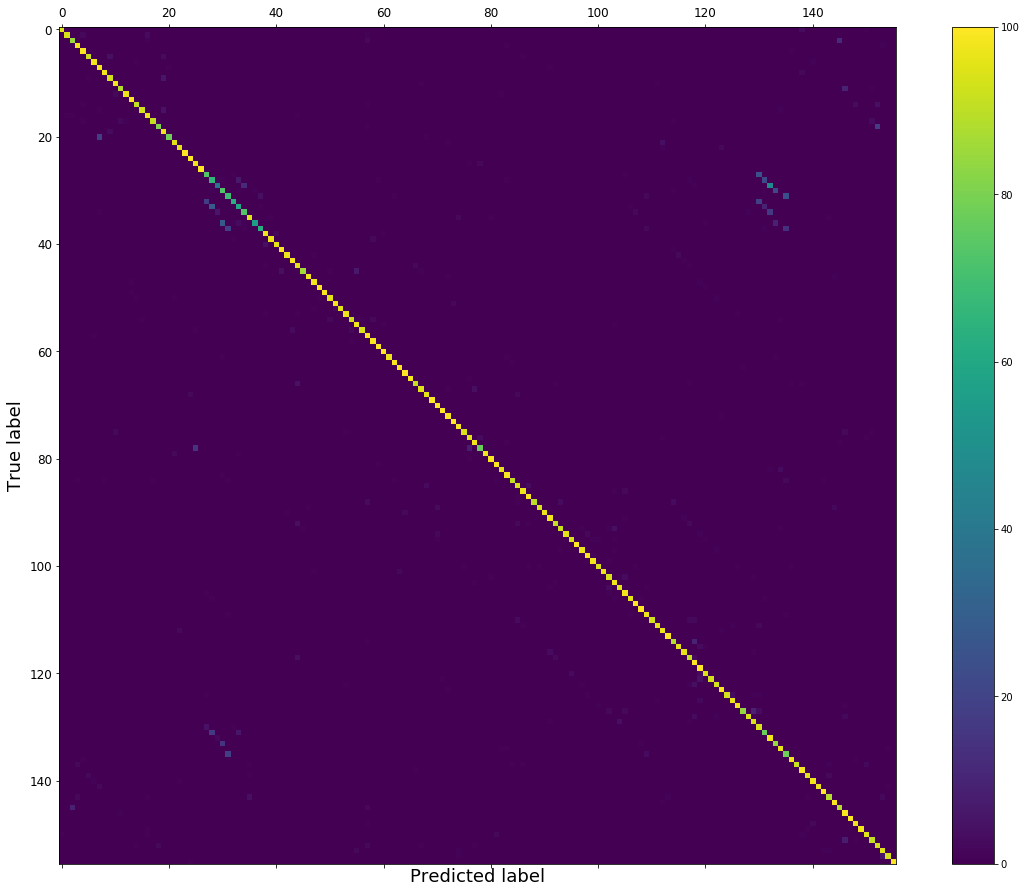

In [15]:
# Confusion Matrix plot

cm = confusion_matrix(test_generator.classes, y_pred)

plt.figure(figsize=(20,15))
plt.matshow(cm, fignum=1)
#plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.show()

In [17]:
# Classification Report on Testing data

print('Classification Report\n')
print(classification_report(test_generator.classes, y_pred))

Classification Report

             precision    recall  f1-score   support

          0       0.99      0.95      0.97       100
          1       0.98      0.94      0.96       100
          2       0.89      0.85      0.87       100
          3       0.95      0.98      0.97       100
          4       0.95      0.99      0.97       100
          5       0.97      0.92      0.94       100
          6       0.98      0.98      0.98       100
          7       0.81      0.98      0.89       100
          8       0.99      0.98      0.98       100
          9       0.93      0.93      0.93       100
         10       0.96      0.98      0.97       100
         11       0.97      0.89      0.93       100
         12       0.99      0.97      0.98       100
         13       0.98      1.00      0.99       100
         14       0.97      0.91      0.94       100
         15       0.99      0.93      0.96       100
         16       0.93      0.97      0.95       100
         17       0.99